In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
os.chdir(r'C:\Users\Sahene\OneDrive\Documents\Code stuff\P scripts\archive')

In [4]:
cv=pd.read_csv('country_vunerable.csv')

In [5]:
cv.head()

,IUCN,IUCN Category,SPEC,Species,COU,Country,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,TOT_KNOWN,Total number of known species,MAMMAL,Mammals,AUS,Australia,NBR,Number,0,Units,NaN,NaN,380.0,NaN,NaN
1,TOT_KNOWN_IND,Total number of indigenous known species,MAMMAL,Mammals,AUS,Australia,NBR,Number,0,Units,NaN,NaN,353.0,NaN,NaN
2,ENDANGERED,Number of endangered species,MAMMAL,Mammals,AUS,Australia,NBR,Number,0,Units,NaN,NaN,38.0,NaN,NaN
3,CRITICAL,Number of critically endangered species,MAMMAL,Mammals,AUS,Australia,NBR,Number,0,Units,NaN,NaN,10.0,NaN,NaN
4,VULNERABLE,Number of vulnerable species,MAMMAL,Mammals,AUS,Australia,NBR,Number,0,Units,NaN,NaN,59.0,NaN,NaN


In [6]:
cv.describe()

,PowerCode Code,Reference Period Code,Reference Period,Value
count,3464.0,0.0,0.0,3464.000000
mean,0.0,NaN,NaN,472.077207
std,0.0,NaN,NaN,3385.100031
min,0.0,NaN,NaN,0.000000
25%,0.0,NaN,NaN,6.000000
50%,0.0,NaN,NaN,23.545000
75%,0.0,NaN,NaN,90.000000
max,0.0,NaN,NaN,114095.000000


In [7]:
specs=cv.columns

In [8]:
specs

Index(['IUCN', 'IUCN Category', 'SPEC', 'Species', 'COU', 'Country',
       'Unit Code', 'Unit', 'PowerCode Code', 'PowerCode',
       'Reference Period Code', 'Reference Period', 'Value', 'Flag Codes',
       'Flags'],
      dtype='object')

In [9]:
Sp=cv['Species']

In [10]:
Co=cv['Country']

In [11]:
Species=pd.unique(sorted(Sp))

In [12]:
Species

array(['Amphibians', 'Birds', 'Fish', 'Freshwater Fish', 'Invertebrates',
       'Lichens', 'Mammals', 'Marine Fish', 'Mosses', 'Reptiles',
       'Vascular plants'], dtype=object)

In [13]:
Countries=pd.unique(sorted(Co))

In [14]:
Countries

array(['Australia', 'Austria', 'Belgium', 'Brazil', 'Canada', 'Chile',
       'Colombia', 'Costa Rica', 'Czech Republic', 'Denmark', 'Estonia',
       'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland',
       'Ireland', 'Israel', 'Italy', 'Japan', 'Korea', 'Latvia',
       'Lithuania', 'Luxembourg', 'Mexico', 'Netherlands', 'New Zealand',
       'Norway', 'Poland', 'Portugal', 'Russia', 'Slovak Republic',
       'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey',
       'United Kingdom'], dtype=object)

In [15]:
len(Countries)

39

In [16]:
len(Species)

11

In [17]:
up1=cv.reindex(columns=['IUCN', 'Species', 'Country', 'Value'])

In [18]:
up1

,IUCN,Species,Country,Value
0,TOT_KNOWN,Mammals,Australia,380.000
1,TOT_KNOWN_IND,Mammals,Australia,353.000
2,ENDANGERED,Mammals,Australia,38.000
3,CRITICAL,Mammals,Australia,10.000
4,VULNERABLE,Mammals,Australia,59.000
...,...,...,...,...
3459,CRITICAL_IND,Lichens,Chile,1.000
3460,VULNERABLE_IND,Lichens,Chile,1.000
3461,THREATENED_IND,Lichens,Chile,2.000
3462,CRITICAL,Mammals,Costa Rica,1.000


In [19]:
up2=up1.loc[up1['IUCN']=='CRITICAL']

In [20]:
up2

,IUCN,Species,Country,Value
3,CRITICAL,Mammals,Australia,10.0
9,CRITICAL,Mammals,Austria,4.0
18,CRITICAL,Mammals,Belgium,4.0
34,CRITICAL,Mammals,Czech Republic,10.0
40,CRITICAL,Mammals,Denmark,1.0
...,...,...,...,...
3440,CRITICAL,Mosses,Mexico,0.0
3441,CRITICAL,Invertebrates,Mexico,1.0
3449,CRITICAL,Fish,Spain,9.0
3456,CRITICAL,Lichens,Chile,1.0


In [21]:
up3=up2.reindex(columns=['Country', 'Value'])

In [22]:
fin=up3.sort_values('Country')

In [23]:
fin

,Country,Value
3,Australia,10.0
1097,Australia,7.0
672,Australia,15.0
1098,Australia,4.0
1099,Australia,3.0
...,...,...
2424,United Kingdom,45.0
2425,United Kingdom,82.0
197,United Kingdom,2.0
1059,United Kingdom,42.0


In [24]:
final=pd.DataFrame(fin.groupby('Country')['Value'].sum())

In [25]:
final.reset_index(inplace=True)

In [26]:
final

,Country,Value
0,Australia,294.0
1,Austria,599.0
2,Belgium,421.0
3,Brazil,453.0
4,Canada,727.0
5,Chile,135.0
6,Colombia,241.0
7,Costa Rica,36.0
8,Czech Republic,1581.0
9,Denmark,257.0


In [27]:
country=final['Country']

In [28]:
value=final['Value']

C:\Program Files\KMSpico\temp\ipykernel_2264\191783777.py:14: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',


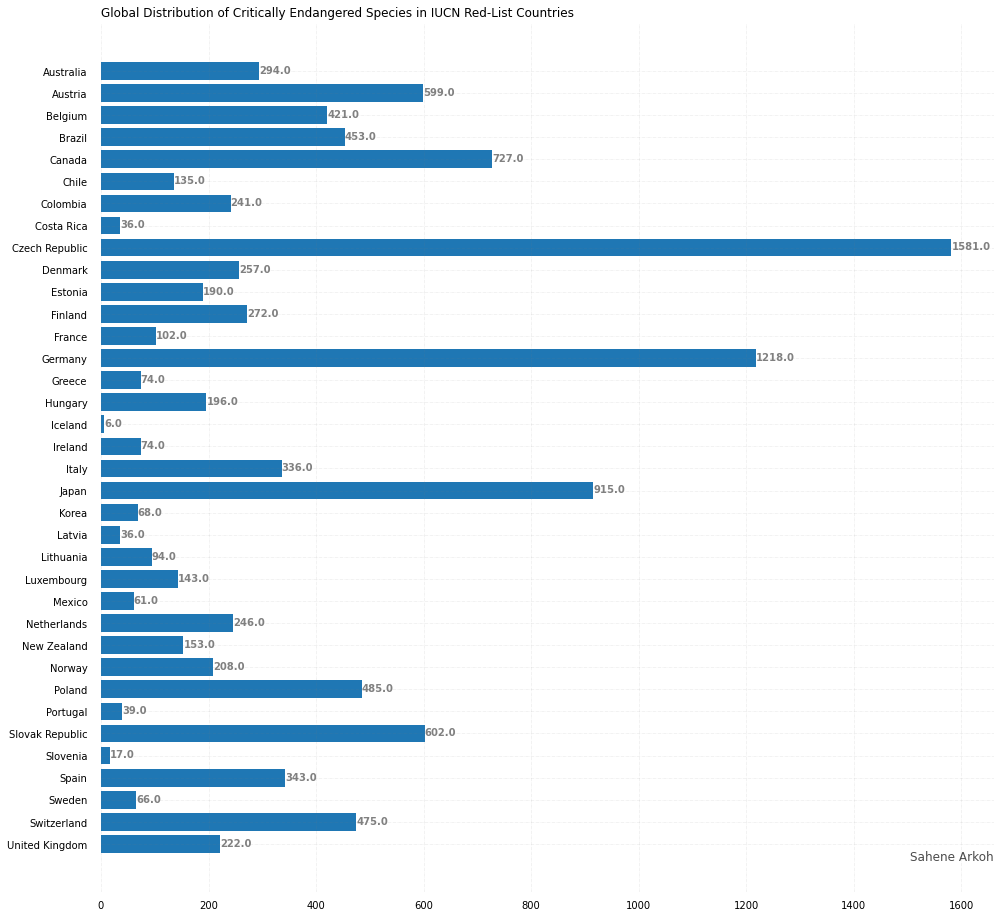

In [29]:
fig, ax = plt.subplots(figsize =(16, 16))

plt.barh(country, value)

for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

ax.invert_yaxis()

for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

ax.set_title('Global Distribution of Critically Endangered Species in IUCN Red-List Countries',
             loc ='left', )

fig.text(0.9, 0.15, 'Sahene Arkoh', fontsize = 12,
         color ='black', ha ='right', va ='bottom',
         alpha = 0.7)

plt.show()